### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

In [46]:
function factorial2(n)
    #set initial value for n!
    fact = 1
    #loop until n
    for i in 1:n
        fact = fact*i
    end
    return fact
end

#Note/Question : this function seems to work well until n=20, but for n=21, I start getting 
#negative answers. with factorial(21), I get "overflowError: 21 is too large to look up in the table"
#Why does my function "solves" this problem with negative values?


factorial2 (generic function with 1 method)

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

In [51]:
function binomial_rv(n, p)
    #get a vector of values generated from uniform law between 0 & 1
    u = rand(n)
    s = zeros(n)
    #for each elmt of u, get dummy 1/0 if >/< p
    for i in 1:n
        u[i] > p ? s[i] = 1 : s[i] = 0
    end
    
    #tried to replace the above for loop by 
    # u. > p ? s. = 1 : s. = 0
    # but for an error message that there was an extra token p after the epression
    
    return sum(s)/n
end

binomial_rv(100,0.2)

binomial_rv (generic function with 1 method)

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

In [53]:
function computePI(nbIter=1000)
    #generate a bivariate uniform random var
    x = rand(nbIter, 2)
    #square it, sum it & take the square root to get the distance
    x .= x.^2
    x = sum(x, dims=2)
    x .= x.^(0.5)
    #if the distance <= 1.0, then inside the circle
    inside = 0
    for j in 1:nbIter
        x[j] <=1.0 ? inside += 1 : nothing
    end
    return (inside / nbIter) * 4  
end

computePI(1000000)

3.140888

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

In [54]:
using Distributions

function payroll(distr=Binomial, n=10)
    #flip the coin n times according to the specified distribution
    R = rand(distr(), n)
    #initially pay 0
    pay = 0
    #change to pay = 1 if condition met
    for i in 1:(n-2)
        if R[i] == R[i+1] == R[i+2]
            pay = 1
        end
    end
    #returns the draw & the result
    return pay, R
end

payroll()

(0, [0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

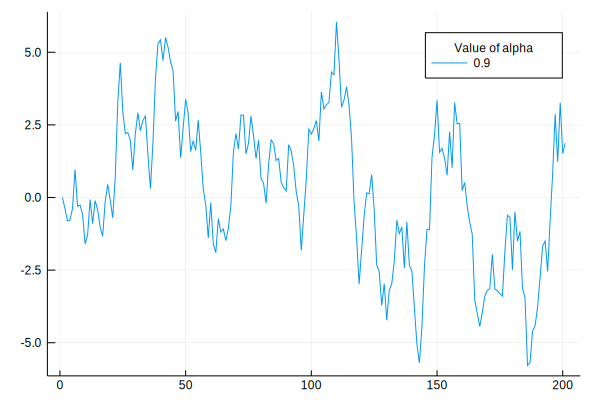

In [55]:
using Distributions
using Plots

function plot_timeseries(n=200, α=0.9)
    x = zeros(n+1)
    for i in 2:n+1
        x[i] = α * x[i-1] + rand(Normal()) 
    end
    plot(x, label=α, legendtitle="Value of alpha")
end


plot_timeseries()

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

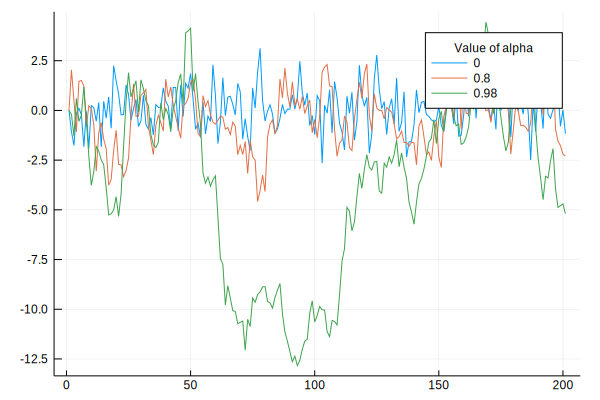

In [56]:
using Distributions
using Plots

function plot_timeseries2(n=200, α1=0, α2=0.8, α3=0.98)
    x = zeros(n+1)
    y = zeros(n+1)
    z = zeros(n+1)
    for i in 2:n+1
        x[i] = α1 * x[i-1] + rand(Normal()) 
        y[i] = α2 * y[i-1] + rand(Normal()) 
        z[i] = α3 * z[i-1] + rand(Normal()) 
    end
    plot(x, label=α1, legendtitle="Value of alpha")
    plot!(y, label=α2)
    plot!(z, label=α3)
end

plot_timeseries2()

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

In [57]:
using(Plots)
using(Distributions)

function Exercise7A(α, σ, tmax, rwalks, r="hist")
    firstpassage = zeros(rwalks)
    for n in 1:rwalks
        x = zeros(tmax+1)
        t0 = tmax-1
        for i in 2:(tmax+1)
            x[i] = α * x[i-1] + σ * rand(Normal()) 
            if x[i] >= α
                t0 = i-1
                break
            end
        end
    firstpassage[n] = t0
    end
    
    #return a plot and an array (to use in next function too)
    (histogram(firstpassage, bins=20), firstpassage)

end

function Exercise7B(α, σ, tmax, rwalks, r="hist")
    means = zeros(length(α))
    for j in 1:length(α)
        means[j] = mean(Exercise7A(α[j], σ, tmax, rwalks, r)[2])
    end
    #needs to learn how to make more fancy plots
    plot(means, marker = 2)
end


        

Exercise7B (generic function with 2 methods)

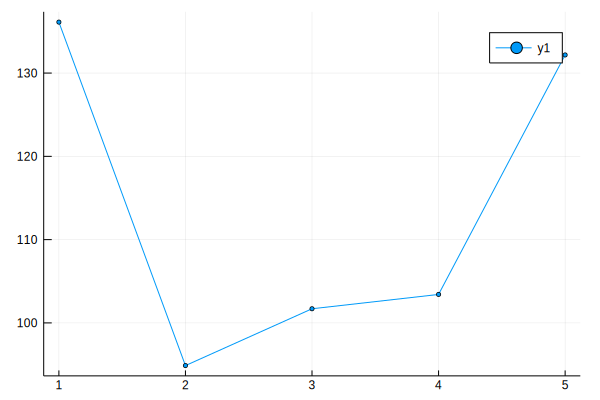

In [45]:
Exercise7B([0.8, 1.0, 1.1], 0.2, 200, 1000,"hist")

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [66]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  